# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# print(query_url)

# set up lists to hold reponse info
lat = []
lon = []
temp = []
cloudiness = []
country = []
humidity = []
max_temp = []
windspeed = []
city_name = []

# Loop through the list of cities and perform a request for data on each
for city in cities[0:len(cities)]:
    response = requests.get(query_url + city).json()
    print(f"Making request for city: {city}")
    try:
        lat.append(response['coord']['lat']) 
        temp.append(response['main']['temp'])
        lon.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        city_name.append(response['name'])
    except KeyError:
        print("City does not exist")


Making request for city: santander
Making request for city: washougal
Making request for city: port alfred
Making request for city: walvis bay
Making request for city: belushya guba
City does not exist
Making request for city: udachnyy
Making request for city: hobart
Making request for city: isangel
Making request for city: mataura
Making request for city: selikhino
Making request for city: tiksi
Making request for city: atuona
Making request for city: dikson
Making request for city: tumannyy
City does not exist
Making request for city: jamestown
Making request for city: punta arenas
Making request for city: ushuaia
Making request for city: mahebourg
Making request for city: lompoc
Making request for city: sirjan
Making request for city: hilo
Making request for city: paamiut
Making request for city: daru
Making request for city: neijiang
Making request for city: tuatapere
Making request for city: geraldton
Making request for city: weiser
Making request for city: lelydorp
Making request

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
city_dict = {
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":max_temp,
    "Wind Speed":windspeed
}
city_df = pd.DataFrame(city_dict)
city_df.head()
city_df.to_csv(output_data_file, index=False)

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

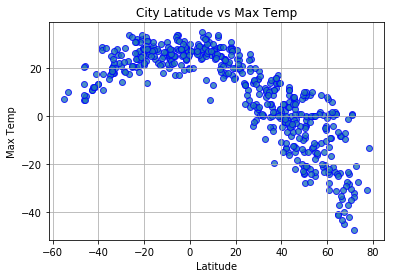

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(city_df["Lat"],city_df["Max Temp"], marker ="o", edgecolors="blue",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp")
plt.grid()
plt.show()
plt.savefig("LatTempPlot.png")

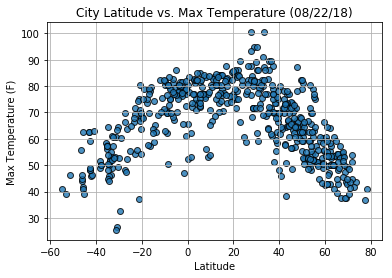

#### Latitude vs. Humidity Plot

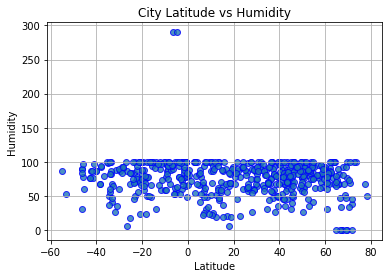

<Figure size 432x288 with 0 Axes>

In [46]:
plt.scatter(city_df["Lat"],city_df["Humidity"], marker ="o", edgecolors="blue",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity")
plt.grid()
plt.show()
plt.savefig("LatHumidityPlot.png")

#### Latitude vs. Cloudiness Plot

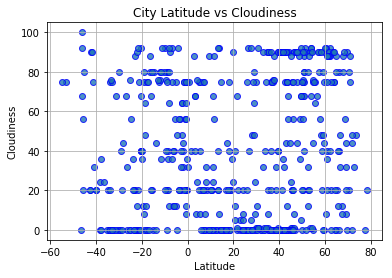

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(city_df["Lat"],city_df["Cloudiness"], marker ="o", edgecolors="blue",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.show()
plt.savefig("LatCloudsPlot.png")

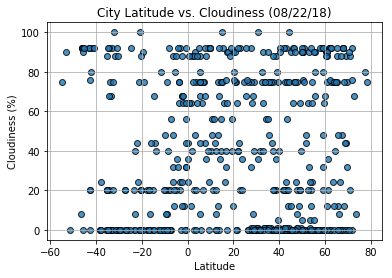

#### Latitude vs. Wind Speed Plot

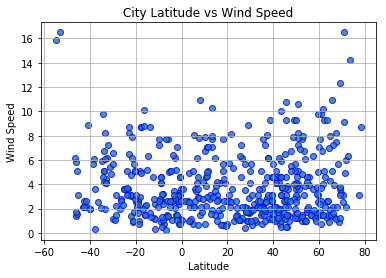

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(city_df["Lat"],city_df["Wind Speed"], marker ="o", edgecolors="blue",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.show()
plt.savefig("LatWindPlot.png")

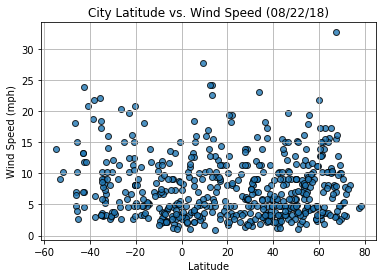